In [140]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data.head()
trial_data.head()

# Combine the data into a single dataset
data = pd.merge(trial_data, mouse_data, how="left", on=["Mouse ID"])

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [141]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tv_gb = data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tv_df = pd.DataFrame(mean_tv_gb).reset_index()

# Preview DataFrame
mean_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [142]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tv_gb = data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
se_tv_df = pd.DataFrame(se_tv_gb).reset_index()

# Preview DataFrame
se_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [143]:
# Minor Data Munging to Re-Format the Data Frames
mean_data = mean_tv_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
se_data = se_tv_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_data.head()
#se_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [144]:
#Make Dataframe that will be used
mean_Capomulin = mean_tv_df.loc[mean_tv_df["Drug"] == "Capomulin", :] 
mean_Infubinol = mean_tv_df.loc[mean_tv_df["Drug"] == "Infubinol", :] 
mean_Ketapril = mean_tv_df.loc[mean_tv_df["Drug"] == "Ketapril", :] 
mean_Placebo = mean_tv_df.loc[mean_tv_df["Drug"] == "Placebo", :] 

se_Capomulin = se_tv_df.loc[mean_tv_df["Drug"] == "Capomulin", :] 
se_Infubinol = se_tv_df.loc[mean_tv_df["Drug"] == "Infubinol", :] 
se_Ketapril = se_tv_df.loc[mean_tv_df["Drug"] == "Ketapril", :] 
se_Placebo = se_tv_df.loc[mean_tv_df["Drug"] == "Placebo", :] 


Text(0, 0.5, 'Tumor Volume (mm3)')

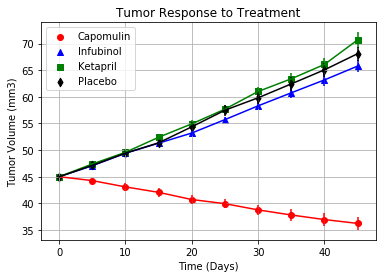

In [145]:
# Generate the Plot (with Error Bars)
Capomulin_plot = plt.scatter(mean_Capomulin["Timepoint"], mean_Capomulin["Tumor Volume (mm3)"], c="red", marker = "o", label ="Capomulin")
Infubinol_plot = plt.scatter(mean_Infubinol["Timepoint"], mean_Infubinol["Tumor Volume (mm3)"], c="blue",  marker = "^", label ="Infubinol")
Ketapril_plot = plt.scatter(mean_Ketapril["Timepoint"], mean_Ketapril["Tumor Volume (mm3)"], c="green", marker = "s", label ="Ketapril")
Placebo_plot = plt.scatter(mean_Placebo["Timepoint"], mean_Placebo["Tumor Volume (mm3)"], c="black",  marker = "d", label ="Placebo")

Capomulin_sebar = plt.errorbar(mean_Capomulin["Timepoint"], mean_Capomulin["Tumor Volume (mm3)"], yerr = se_Capomulin["Tumor Volume (mm3)"], c="red")
Infubinol_sebar = plt.errorbar(mean_Infubinol["Timepoint"], mean_Infubinol["Tumor Volume (mm3)"], yerr = se_Infubinol["Tumor Volume (mm3)"],c="blue")
Ketapril_sebar = plt.errorbar(mean_Ketapril["Timepoint"], mean_Ketapril["Tumor Volume (mm3)"], yerr = se_Ketapril["Tumor Volume (mm3)"], c="green")
Placebo_sebar = plt.errorbar(mean_Placebo["Timepoint"], mean_Placebo["Tumor Volume (mm3)"], yerr = se_Placebo["Tumor Volume (mm3)"], c="black")

#Add labels
plt.legend(handles=[Capomulin_plot,Infubinol_plot,Ketapril_plot,Placebo_plot],loc="best")
plt.grid()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')


# Save the Figure

In [146]:
#Save Plot
plt.savefig("Tumor Response to Treatment.png")

<Figure size 432x288 with 0 Axes>

In [147]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_ms_gb = data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_ms_df = pd.DataFrame(mean_ms_gb).reset_index()

# Preview DataFrame
mean_ms_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [148]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_ms_gb = data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
se_ms_df = pd.DataFrame(se_ms_gb).reset_index()

# Preview DataFrame
se_ms_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [149]:
# Minor Data Munging to Re-Format the Data Frames
mean_ms_data = mean_ms_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
se_ms_data = se_ms_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
mean_ms_data.head()
#se_ms_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [150]:
ms_mean_Capomulin = mean_ms_df.loc[mean_ms_df["Drug"] == "Capomulin", :] 
ms_mean_Infubinol = mean_ms_df.loc[mean_ms_df["Drug"] == "Infubinol", :] 
ms_mean_Ketapril = mean_ms_df.loc[mean_ms_df["Drug"] == "Ketapril", :] 
ms_mean_Placebo = mean_ms_df.loc[mean_ms_df["Drug"] == "Placebo", :] 

ms_se_Capomulin = se_ms_df.loc[mean_ms_df["Drug"] == "Capomulin", :] 
ms_se_Infubinol = se_ms_df.loc[mean_ms_df["Drug"] == "Infubinol", :] 
ms_se_Ketapril = se_ms_df.loc[mean_ms_df["Drug"] == "Ketapril", :] 
ms_se_Placebo = se_ms_df.loc[mean_ms_df["Drug"] == "Placebo", :] 

Text(0, 0.5, 'Met. Site')

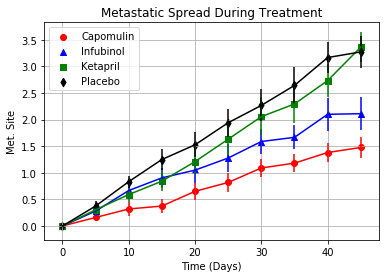

In [151]:
# Generate the Plot (with Error Bars)
ms_Capomulin_plot = plt.scatter(ms_mean_Capomulin["Timepoint"], ms_mean_Capomulin["Metastatic Sites"], c="red", marker = "o", label ="Capomulin")
ms_Infubinol_plot = plt.scatter(ms_mean_Infubinol["Timepoint"], ms_mean_Infubinol["Metastatic Sites"], c="blue",  marker = "^", label ="Infubinol")
ms_Ketapril_plot = plt.scatter(ms_mean_Ketapril["Timepoint"], ms_mean_Ketapril["Metastatic Sites"], c="green", marker = "s", label ="Ketapril")
ms_Placebo_plot = plt.scatter(ms_mean_Placebo["Timepoint"], ms_mean_Placebo["Metastatic Sites"], c="black",  marker = "d", label ="Placebo")

ms_Capomulin_sebar = plt.errorbar(ms_mean_Capomulin["Timepoint"], ms_mean_Capomulin["Metastatic Sites"], yerr = ms_se_Capomulin["Metastatic Sites"], c="red")
ms_Infubinol_sebar = plt.errorbar(ms_mean_Infubinol["Timepoint"], ms_mean_Infubinol["Metastatic Sites"], yerr = ms_se_Infubinol["Metastatic Sites"],c="blue")
ms_Ketapril_sebar = plt.errorbar(ms_mean_Ketapril["Timepoint"], ms_mean_Ketapril["Metastatic Sites"], yerr = ms_se_Ketapril["Metastatic Sites"], c="green")
ms_Placebo_sebar = plt.errorbar(ms_mean_Placebo["Timepoint"], ms_mean_Placebo["Metastatic Sites"], yerr = ms_se_Placebo["Metastatic Sites"], c="black")

#Add labels
plt.legend(handles=[ms_Capomulin_plot,ms_Infubinol_plot,ms_Ketapril_plot,ms_Placebo_plot],loc="best")
plt.grid()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Site')

In [152]:
#Save Plot
plt.savefig("Metastatic Spread During Treatment.png")

<Figure size 432x288 with 0 Axes>

In [153]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_gb = data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count_gb).reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [154]:
# Minor Data Munging to Re-Format the Data Frame
mouse_count_data = mouse_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mouse_count_data.head()

# Preview the Data Frame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Text(0, 0.5, 'Survival Rate %')

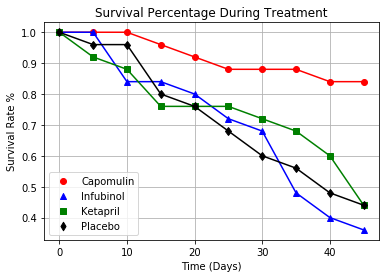

In [155]:
# Generate the Plot (Accounting for percentages)
Capomulin_mice_count = mouse_count_df.loc[mouse_count_df["Drug"] == "Capomulin",:]
Infubinol_mice_count = mouse_count_df.loc[mouse_count_df["Drug"] == "Infubinol",:]
Ketapril_mice_count = mouse_count_df.loc[mouse_count_df["Drug"] == "Ketapril",:]
Placebo_mice_count = mouse_count_df.loc[mouse_count_df["Drug"] == "Placebo",:]

percent_Capomulin = Capomulin_mice_count["Mouse ID"]/Capomulin_mice_count["Mouse ID"].iloc[0]
percent_Infubinol = Infubinol_mice_count["Mouse ID"]/Infubinol_mice_count["Mouse ID"].iloc[0]
percent_Ketapril = Ketapril_mice_count["Mouse ID"]/Ketapril_mice_count["Mouse ID"].iloc[0]
percent_Placebo = Placebo_mice_count["Mouse ID"]/Placebo_mice_count["Mouse ID"].iloc[0]

mouse_plot_c = plt.plot(Capomulin_mice_count["Timepoint"], percent_Capomulin, c="red", marker = "o", label ="Capomulin")
mouse_plot_i = plt.plot(Infubinol_mice_count["Timepoint"], percent_Infubinol, c="blue",  marker = "^", label ="Infubinol")
mouse_plot_k = plt.plot(Ketapril_mice_count["Timepoint"], percent_Ketapril, c="green",  marker = "s", label ="Ketapril")
mouse_plot_p = plt.plot(Placebo_mice_count["Timepoint"], percent_Placebo, c="black",  marker = "d", label ="Placebo")

plt.legend(handles=[ms_Capomulin_plot,ms_Infubinol_plot,ms_Ketapril_plot,ms_Placebo_plot],loc="best")
plt.grid()
plt.title('Survival Percentage During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate %')

# Save the Figure

# Show the Figure

In [156]:
#Save Plot
plt.savefig("Survival Percentage During Treatment.png")

<Figure size 432x288 with 0 Axes>

Text(3, 6, '51.30%')

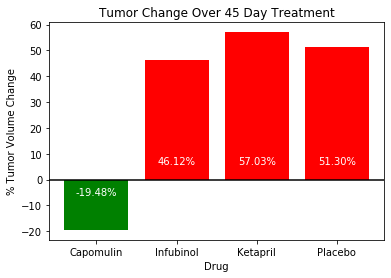

In [183]:
# Calculate the percent changes for each drug
#k = data.groupby(["Drug","Timepoint"]).get_values()["Tumor Volume (mm3)"]
#k = pd.DataFrame(k).reset_index()

mean_Capomulin = mean_tv_df.loc[mean_tv_df["Drug"] == "Capomulin", :] 
mean_Infubinol = mean_tv_df.loc[mean_tv_df["Drug"] == "Infubinol", :] 
mean_Ketapril = mean_tv_df.loc[mean_tv_df["Drug"] == "Ketapril", :] 
mean_Placebo = mean_tv_df.loc[mean_tv_df["Drug"] == "Placebo", :] 

Campomulin_change = (mean_Capomulin["Tumor Volume (mm3)"].iloc[9]-mean_Capomulin["Tumor Volume (mm3)"].iloc[0])/mean_Capomulin["Tumor Volume (mm3)"].iloc[0]*100
Infubinol_change = (mean_Infubinol["Tumor Volume (mm3)"].iloc[9]-mean_Infubinol["Tumor Volume (mm3)"].iloc[0])/mean_Infubinol["Tumor Volume (mm3)"].iloc[0]*100
Ketapril_change = (mean_Ketapril["Tumor Volume (mm3)"].iloc[9]-mean_Ketapril["Tumor Volume (mm3)"].iloc[0])/mean_Ketapril["Tumor Volume (mm3)"].iloc[0]*100
Placebo_change = (mean_Placebo["Tumor Volume (mm3)"].iloc[9]-mean_Placebo["Tumor Volume (mm3)"].iloc[0])/mean_Placebo["Tumor Volume (mm3)"].iloc[0]*100

Campomulin_bar = plt.bar(mean_Capomulin["Drug"],Campomulin_change, color="green", label = "Campomulin")
Infubinol_bar = plt.bar(mean_Infubinol["Drug"],Infubinol_change, color="red", label = "Infubinol")
Ketapril_bar = plt.bar(mean_Ketapril["Drug"],Ketapril_change, color="red", label = "Ketapril")
Placebo_bar = plt.bar(mean_Placebo["Drug"],Placebo_change, color="red", label = "Placebo")

plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.axhline(0, color = "black")
plt.text(x, -6, '{:.2f}%'.format(Campomulin_change), horizontalalignment='center',color = "white")
plt.text(1, 6, '{:.2f}%'.format(Infubinol_change), horizontalalignment='center',color = "white")
plt.text(2, 6, '{:.2f}%'.format(Ketapril_change), horizontalalignment='center',color = "white")
plt.text(3, 6, '{:.2f}%'.format(Placebo_change), horizontalalignment='center',color = "white")

# Display the data to confirm

In [186]:
plt.savefig("Tumor Change Over 45 Day Treatment.png")

<Figure size 432x288 with 0 Axes>